In [67]:
import pandas as pd
from datetime import datetime

In [68]:
df = pd.read_csv("data/df_hack_final.csv")

#### Формат имен признаков:
- Ni_rec – извлечение никеля в готовый никелевый продукт, концентрат (значение может отсутствовать, валидны только меньше 1 и больше 0),
- Ore, oreth – имена, которые означают признаки рудного сгустителя (Ore thickener) и на входе первой ФМ (напомним, ФМ – флотомашина),
- resth – имена, которые означают признаки сгустителя с готовым никелевым продуктом (Final Ni thickener).
- Физические характеристики: Mass (масса), Dens (плотность), Vol (объём), Ni (никель), Cu (медь), AU (флаг автоуправления, если оптимизатор управления ФМ включен, то равен 1 – фактические диапазоны на этой ФМ актуальны, в противном случае диапазонам не следует доверять, так как не обновлялись после выключения оптимизатора)
- Суффиксы имён ФМ (положения в цепи агрегатов): 1.1, 1.2, …, 6.2 (см Схему флотации).
- Суффиксы продуктов: F – питание ФМ, C – концентрат ФМ, T – хвосты ФМ.
- Суффиксы границ фактических диапазонов, которые были выставлены технологом для оптимизатора ФМ: min, max.


In [69]:
df = df.astype({'MEAS_DT': 'datetime64[ns]'})

In [70]:
df.describe()

,MEAS_DT,Cu_oreth,Ni_oreth,Ore_mass,Mass_1,Mass_2,Dens_4,Mass_4,Vol_4,Cu_4F,...,Cu_3.1T_max,Cu_3.1T_min,FM_3.2_A,Cu_3.2C_max,Cu_3.2C_min,Ni_3.2C_max,Ni_3.2C_min,Cu_3.2T_max,Cu_3.2T_min,Ni_rec
count,30336,26213.000000,26213.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,30336.000000,26083.000000,...,30335.000000,30335.000000,30335.000000,30335.000000,30335.000000,3.033500e+04,30335.0,30335.000000,30335.000000,27759.000000
mean,2024-06-06 23:52:29.999999744,2.712405,1.685584,1213.996028,1346.755948,789.375929,1.386676,811.542840,1520.387530,0.477034,...,1.627824,0.818042,0.331235,15.653601,13.036163,3.700000e+00,3.5,1.576072,0.863170,0.947898
min,2024-01-01 00:00:00,1.654600,1.141700,0.000000,-0.258293,-0.167950,0.000000,-0.083749,0.000000,0.100100,...,1.000000,0.600000,0.000000,14.000000,12.000000,3.700000e+00,3.5,1.000000,0.600000,0.594336
25%,2024-03-19 23:56:15,2.523700,1.574000,1133.500000,1310.454010,762.188248,1.378594,791.388550,1523.531250,0.396900,...,1.400000,0.600000,0.000000,15.000000,13.000000,3.700000e+00,3.5,1.400000,0.700000,0.933853
50%,2024-06-06 23:52:30,2.694400,1.685100,1274.500000,1400.961060,817.151642,1.398115,836.229218,1562.812500,0.468100,...,1.800000,0.800000,0.000000,15.500000,13.000000,3.700000e+00,3.5,1.600000,0.900000,0.943993
75%,2024-08-24 23:48:45,2.894800,1.792700,1395.500000,1475.273743,864.989029,1.415396,875.025543,1595.750000,0.541200,...,1.800000,0.900000,1.000000,16.500000,13.000000,3.700000e+00,3.5,1.800000,1.000000,0.966216
max,2024-11-11 23:45:00,4.048000,2.617300,2000.000000,2089.517578,1221.758057,1.651951,1303.474609,2028.375000,5.205700,...,2.000000,1.200000,1.000000,17.000000,15.000000,3.700000e+00,3.5,1.800000,1.300000,1.000000
std,NaN,0.284495,0.163395,304.202121,272.748762,153.755873,0.072671,147.976016,254.858332,0.176787,...,0.328567,0.170884,0.470665,0.901482,0.573167,8.881931e-16,0.0,0.236993,0.166731,0.020704


<Axes: >

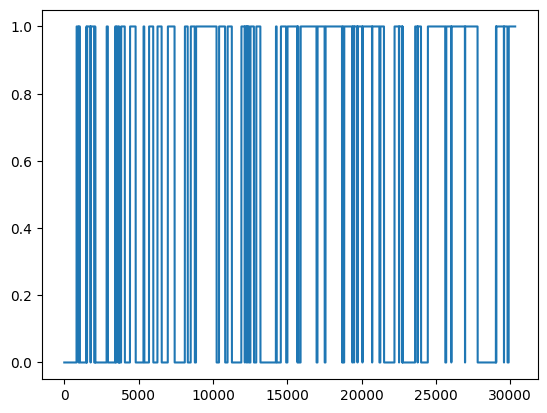

In [71]:
df['FM_1.1_A'].plot()

In [72]:
# import re

In [73]:
# def get_dataframe_per_fm(df, i, j):
#     non_digit_features = [col for col in df.columns.tolist() if not re.findall(r'\d+', col)]
#     filtered_columns_1 = [col for col in df.columns.tolist() if re.findall(f'{i}\\.{j}', col)]
#     filtered_columns_2 = [col for col in df.columns.tolist() if re.findall(f'_{i}$', col)]
#     return df[non_digit_features+filtered_columns_1+filtered_columns_2]

# dfd = {f"fm{i}.{j}" : get_dataframe_per_fm(df, i, j) for j in range(1,3) for i in range(1,7)}

### EDA

In [74]:
import matplotlib.pyplot as plt

In [75]:
# df = dfd['fm1.1']

In [76]:
# df = df.fillna(df.mean())

In [77]:
# normalized_df=(df[df.columns[1:]]-df[df.columns[1:]].mean())/df[df.columns[1:]].std()

In [78]:
# normalized_df['MEAS_DT'] = df['MEAS_DT']

In [79]:
# 4 15-и минутки в часе
# отображу 1 смену
# normalized_df_limited = normalized_df.head(4 * 24 * 7)

In [80]:
# normalized_df

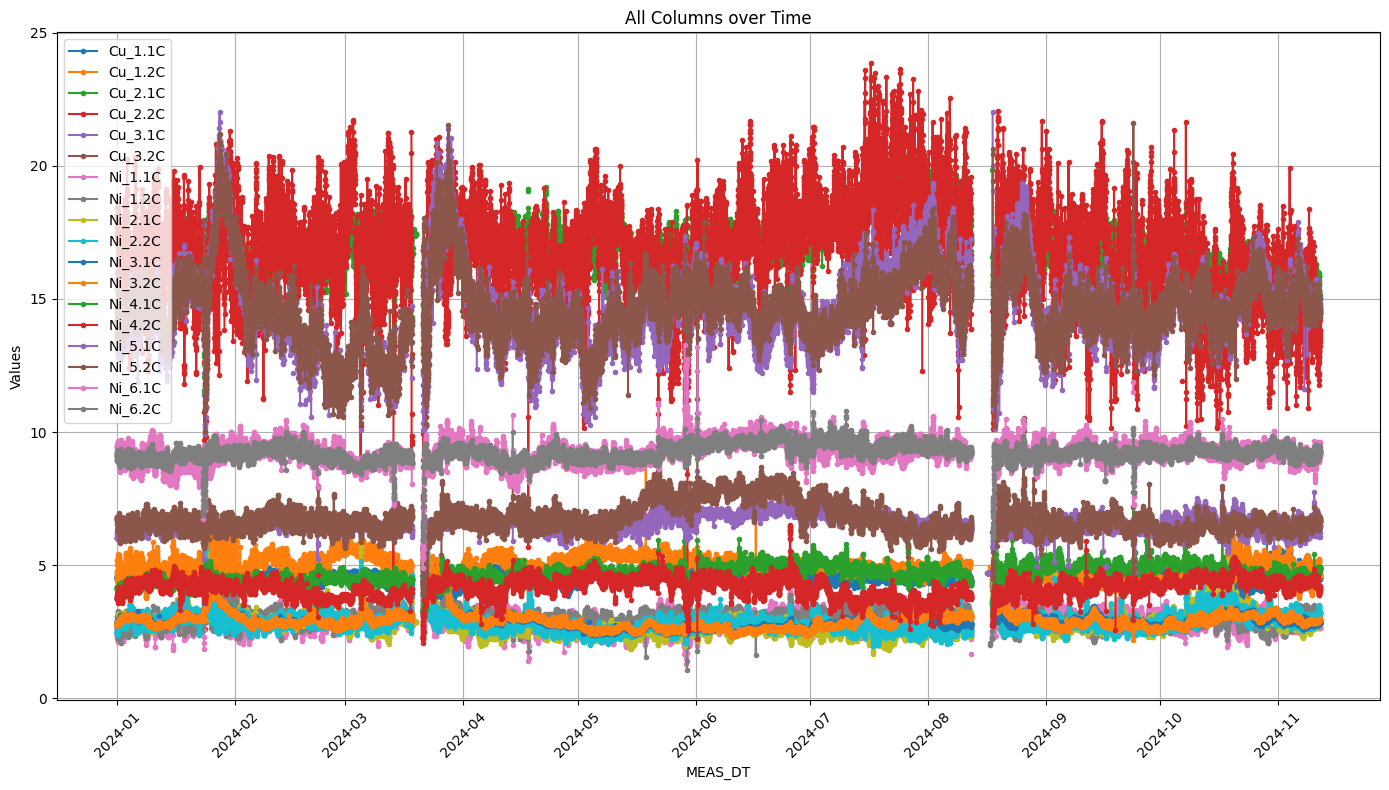

In [81]:
# Plot all specified columns on one plot
plt.figure(figsize=(14, 8))
for metal in ["Cu", "Ni"]:
    for i in range(1,7):
        for j in range(1,3):
            label_ = f'{metal}_{i}.{j}C'
            if label_ in df.columns:
                plt.plot(df['MEAS_DT'], df[label_], marker='.', linestyle='-', label=label_)

plt.xlabel('MEAS_DT')
plt.ylabel('Values')
plt.title('All Columns over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

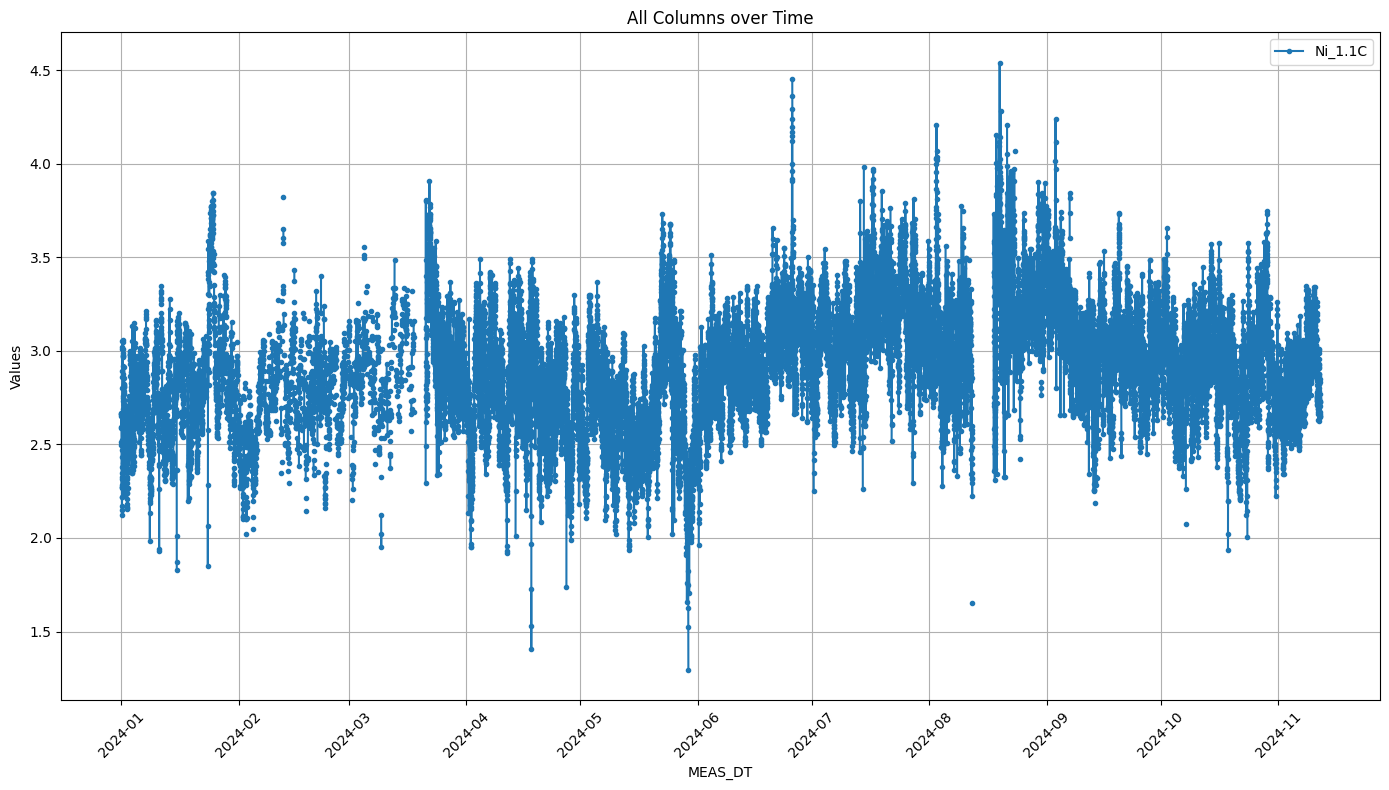

In [42]:
# Plot all specified columns on one plot
plt.figure(figsize=(14, 8))
plt.plot(df['MEAS_DT'], df['Ni_1.1C'], marker='.', linestyle='-', label='Ni_1.1C')

plt.xlabel('MEAS_DT')
plt.ylabel('Values')
plt.title('All Columns over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

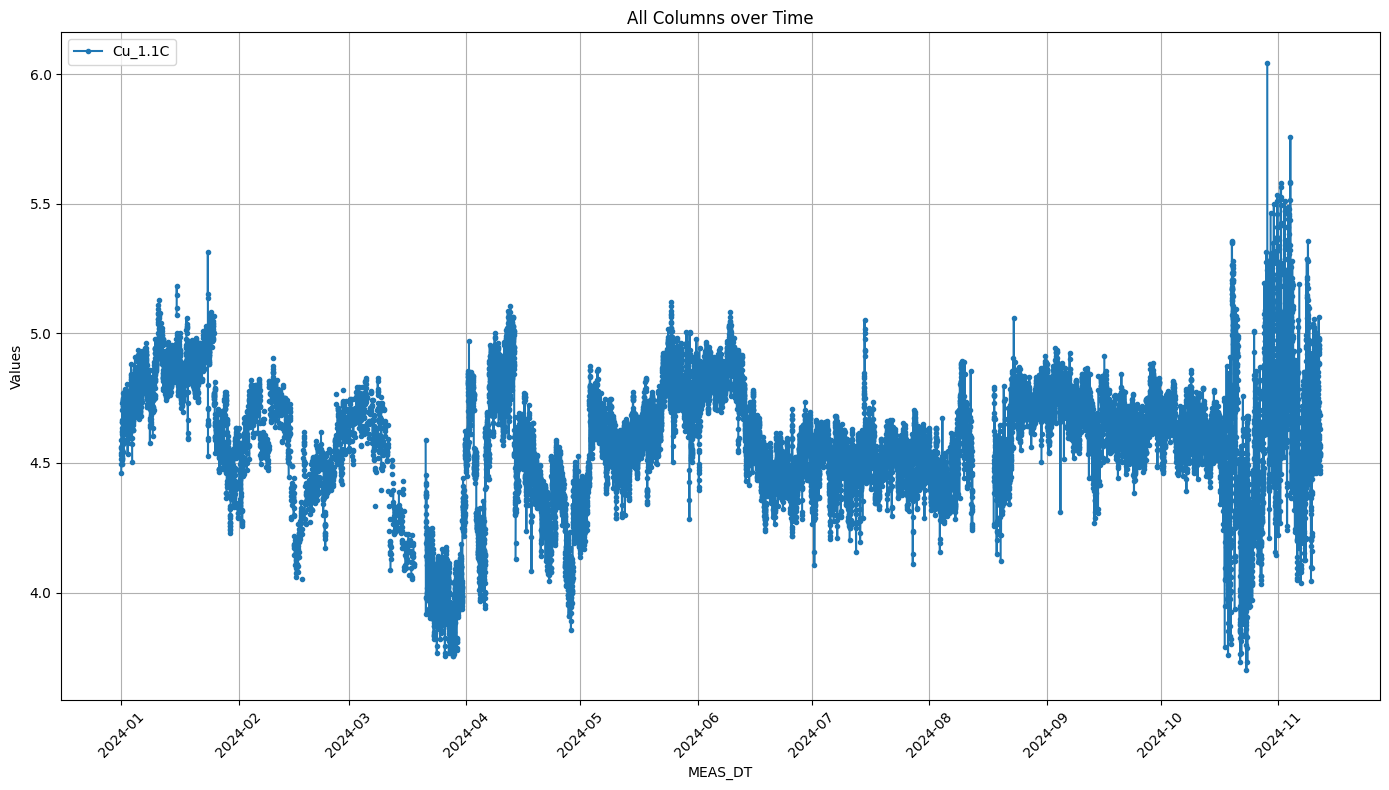

In [43]:
# Plot all specified columns on one plot
plt.figure(figsize=(14, 8))
plt.plot(df['MEAS_DT'], df['Cu_1.1C'], marker='.', linestyle='-', label='Cu_1.1C')

plt.xlabel('MEAS_DT')
plt.ylabel('Values')
plt.title('All Columns over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

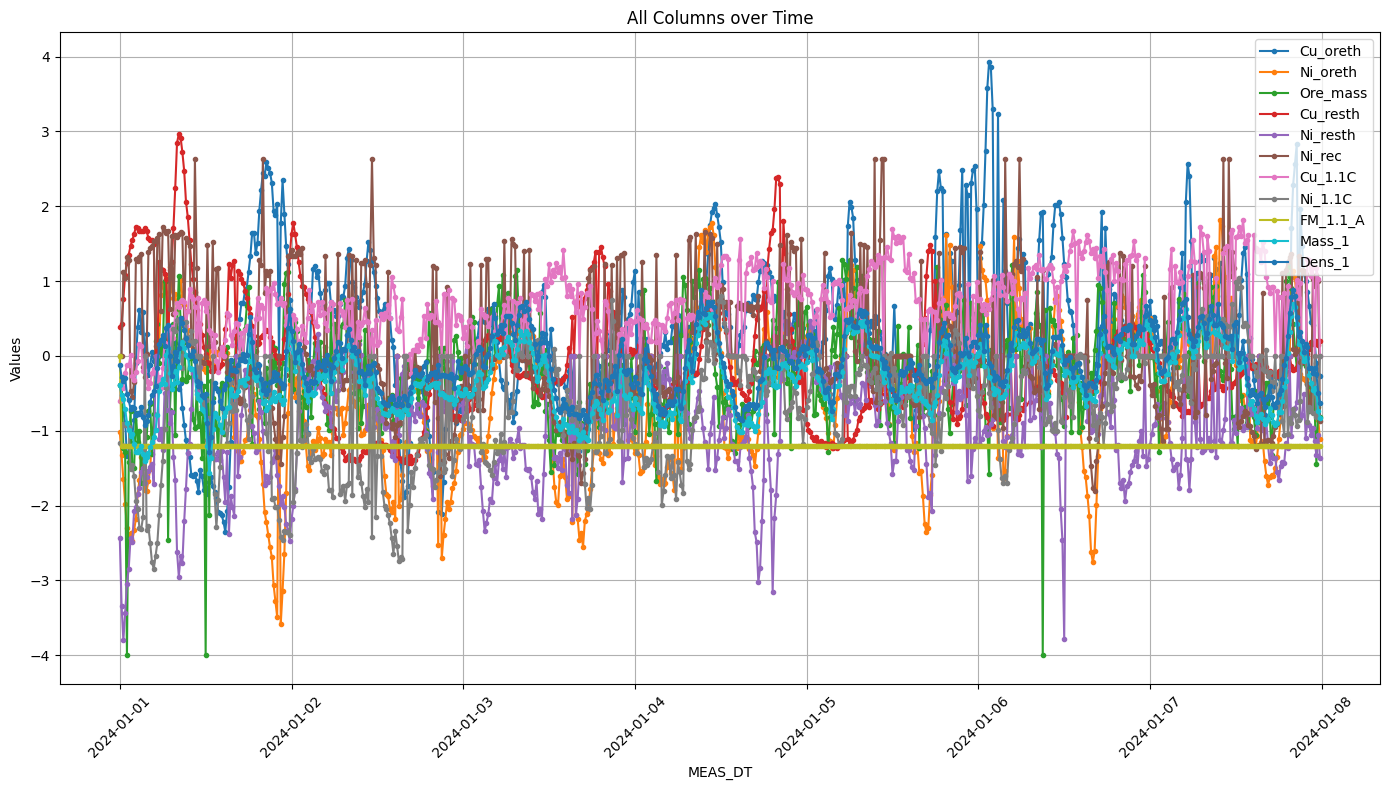

In [112]:
# Plot all specified columns on one plot
plt.figure(figsize=(14, 8))
for column in normalized_df_limited.columns:
    # Skip 'MEAS_DT'
    if column in ('MEAS_DT'):
        continue
    if "max" in column or "min" in column:    
        # plt.plot(normalized_df_limited['MEAS_DT'], normalized_df_limited[column], marker='o', linestyle='-', label=column)
        continue
    else:
        plt.plot(normalized_df_limited['MEAS_DT'], normalized_df_limited[column], marker='.', linestyle='-', label=column)

plt.xlabel('MEAS_DT')
plt.ylabel('Values')
plt.title('All Columns over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

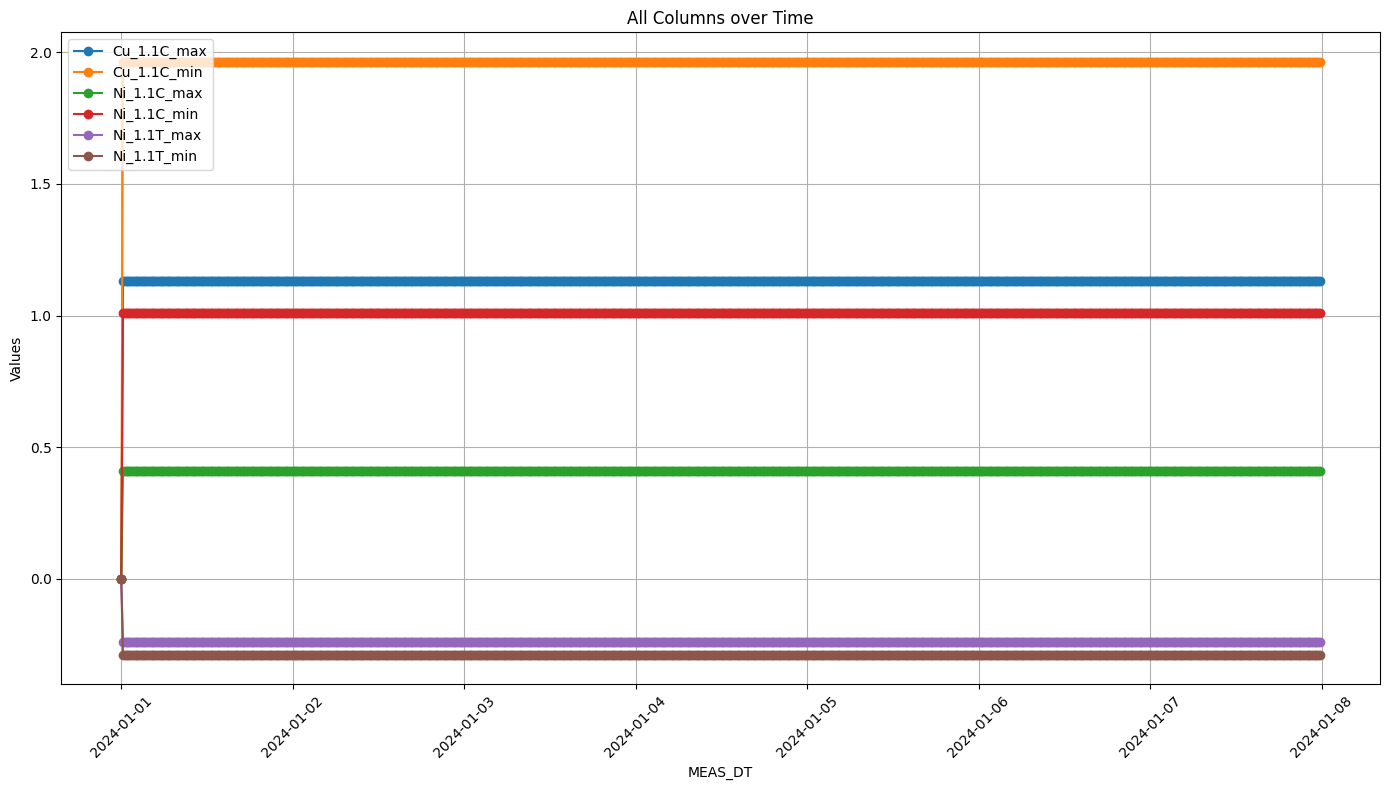

In [113]:
# Plot all specified columns on one plot
plt.figure(figsize=(14, 8))
for column in normalized_df_limited.columns:
    # Skip 'MEAS_DT'
    if column in ('MEAS_DT'):
        continue
    if "max" in column or "min" in column:    
        plt.plot(normalized_df_limited['MEAS_DT'], normalized_df_limited[column], marker='o', linestyle='-', label=column)
        # continue
    else:
        # plt.plot(normalized_df_limited['MEAS_DT'], normalized_df_limited[column], marker='.', linestyle='-', label=column)
        continue

plt.xlabel('MEAS_DT')
plt.ylabel('Values')
plt.title('All Columns over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()